# DSP LAB 10: Frequency shifting

### Pitch detection, shifting and auto-tune

This week the topic will be use what we’ve learned in working with the frequency
domain and apply it to create our own but very basic auto-tuning algorithm.
Auto-tuning or pitch-correction is a method of detecting the pitch, or in our
case the dominant frequency in an audio sample and then correcting it to a
different frequency.
Pitch correction for an audio input consists of 5 primary steps:
1. Breaking the audio into chunks
2. Detecting the pitch of each chunk
3. Required pitch correction value calculation
4. Shifting the chunk’s pitch
5. Stitching the audio back together

In our case we will not be using state of the art and optimized methods like
PYIN, instead we will use a slightly slower approach by bringing each chunk
into frequency domain and doing basic array operations those chunks.
Since our implementation of pitch correction will be using the ”dirty” method,
the output will have several audio artefacts. Modern auto-tuning algorithms account and correct for those as well but the basic concept remains unchanged.

### Useful functions in Python

In [ ]:
# # f f t domain a r r ay i n d e x and f r e q u e n c y r e l a t i o n
# s h i f t b i n s = int ( d e s i r e d s h i f t ∗ time dom . shape [ 0 ] / s am pl e r a t e )
# # numpy f u n c t i o n t h a t can be used t o s h i f t an a r r ay
# np . r o l l ( a r r , s h i f t )
# # np . r o l l ( [ 1 , 2 , 3 , 4 , 5 ] , 2) −> [ 4 , 5 , 1 , 2 , 3 ]
# #######
# # For t e s t i n g you can use c h i r p t o make a s i g n a l t h a t
# # sweeps from one s p e c i f i c f r e q u e n c y t o an o t he r
# from s ci p y . s i g n a l import c hi r p
# i n t e r v a l l e n g t h = 5 # in sec on d s
# s am pl e r a t e = 44100 # s am pl ing o f your s i g n a l
# f 0 = 100 # f r e q u e n c y 1 in Hz
# f 1 = 1000 # f r e q u e n c y 2 in Hz
# t = np . l i n s p a c e ( 0 , i n t e r v a l l e n g t h , int ( s am pl e r a t e ∗ i n t e r v a l l e n g t h ) )
# s w e e p si g n al = c hi r p ( t , f 0=f0 , f 1=f1 , t 1=i n t e r v a l l e n g t h , method=’ l i n e a r ’ )
# s w e e p si g n al ∗= 1 e9 # S c al e t h e s i g n a l t o be a u d i b l e f o r i n t 3 2

In [2]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import chirp

In [8]:
interval_length = 5
sample_rate = 44100
f0 = 440
f1 = 440
t = np.linspace(0, interval_length, int(sample_rate*interval_length))

sweep_signal = chirp(t, f0=f0, f1=f1, t1 = interval_length, method="linear")
sweep_signal *= 1e9

In [4]:
#wavfile.write("chirp.wav", sample_rate, sweep_signal.astype("int32"))

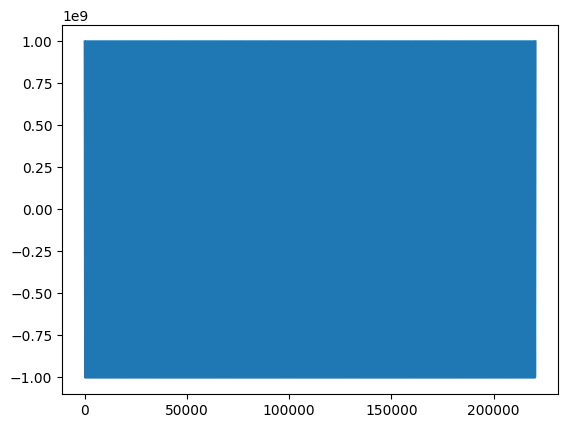

In [7]:
plt.plot(sweep_signal)
plt.show()

In [9]:
Fs, raw = wavfile.read("chirp.wav")
time_dom = np.array(raw)

freq_dom = np.fft.fft(time_dom)
freq_range = np.abs(np.fft.fftfreq(time_dom.shape[0], d=1/Fs))

C:\Users\Nikita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


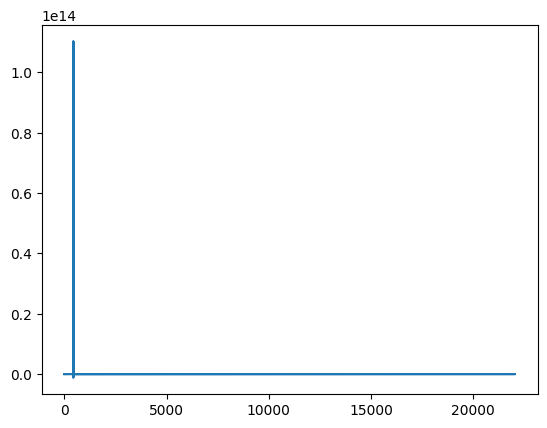

In [10]:
plt.plot(freq_range, freq_dom)
plt.show()

In [ ]:
def find_pitch(freq_dom, freq_range):
    peak_index = np.argmax(np.abs(freq_dom))
    pitch = freq_range[peak_index]
    return pitch

